#Clustering California Housing with K-means

# 1. PRE-PROCESSING THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import random as random
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

def loadHousingData():
  housing = pd.read_csv('/housing.csv')
  return housing

housing = loadHousingData()

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

X_train = full_pipeline.fit_transform(housing)

# 2. IMPLEMENTING K-MEANS (40 pts)

In [ ]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

class myKMeans:
  def __init__ (self, k):
    self.k = k;
    self.labels = [];
    self.centroids = [];

  def distanceMeasure(self, x, y, p):
    distance = 0
    for i in range(len(x)):
      distance += abs(x[i] - y[i]) ** p
    distance = distance ** (1/p)
    return distance

  def cluster_assignment(self, point, centroids):
    min_distance = float('inf')
    closest_cluster = None

    for i, centroid in enumerate(centroids):
      distance = self.distanceMeasure(point, centroid, 1)
      if distance < min_distance:
        min_distance = distance
        closest_cluster = i

    return closest_cluster

  def kMeans(self, X_train):
    random_numbers = [random.randint(0, len(X_train)) for _ in range(self.k)]
    centroids = [X_train[i] for i in random_numbers]
    tolerance = 1e-4
    max_iterations = 10

    for iters in range(max_iterations):
      labels = [self.cluster_assignment(point, centroids) for point in X_train]
      new_centroids = []
      for cluster in range(self.k):
        reassigned_points = [X_train[i] for i in range(len(X_train)) if labels[i] == cluster]
        new_centroid = np.mean(reassigned_points, axis=0)
        new_centroids.append(new_centroid)
      centroid_difference = np.abs(np.array(centroids) - np.array(new_centroids))
      if np.max(centroid_difference) < tolerance:
        break
      centroids = new_centroids
    self.labels = labels
    self.centroids = centroids
    return centroids

  def squaredError(self, X_train):
    sse = 0
    for i, point in enumerate(X_train):
      cluster = self.labels[i]
      centroid = self.centroids[cluster]
      distance = self.distanceMeasure(point, centroid, 1)
      sse += distance ** 2
    return sse

  def getClusterMeans(self):
    return self.centroids

  def standardDeviation(self, X_train):
    cluster_devs = []
    for cluster in range(self.k):
      points = [X_train[i] for i in range(len(X_train)) if self.labels[i] == cluster]
      deviation = np.std(points, axis=0)
      cluster_devs.append(deviation)
    return cluster_devs

# 3. CLUSTERING HOUSING INTO REGIONS


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def plotMap():
  california_img=mpimg.imread('/california.png');
  ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                          label="Cluster",
                        c=kMeans.labels, cmap=plt.get_cmap('jet'),
                        colorbar=False, alpha=0.4,
                        );
  plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.2,
            cmap=plt.get_cmap("jet"));
  plt.ylabel("Latitude", fontsize=14);
  plt.xlabel("Longitude", fontsize=14);

  plt.legend(fontsize=16);

Sum Squared Error for 1 clusters: 1587239.5514772374
Cluster means: [array([-6.52781016e-15,  1.25626254e-15,  8.55700093e-16,  1.47518060e-16,
       -2.82308092e-16, -6.46544215e-17,  2.13935781e-16,  3.73425451e-16,
        8.95063524e-16,  4.42635659e-01,  3.17393411e-01,  2.42248062e-04,
        1.10949612e-01,  1.28779070e-01])]
Within cluster standard deviation [array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.49669843,
       0.46546196, 0.01556243, 0.31406973, 0.33495525])]


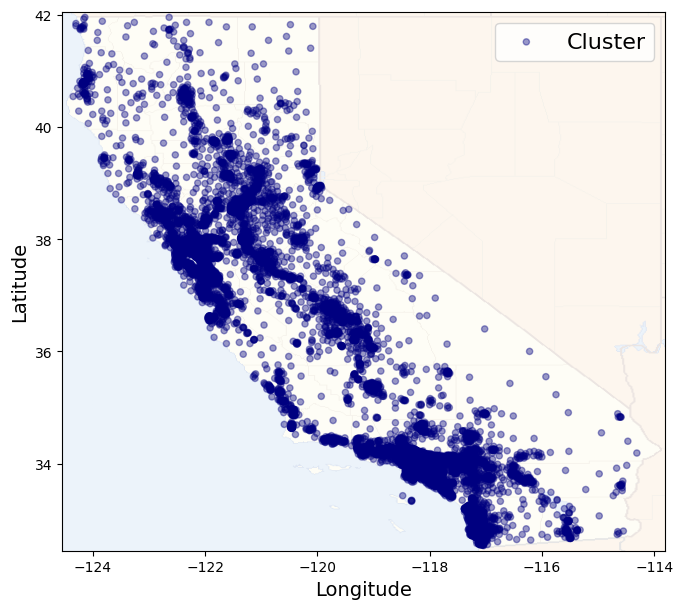

Sum Squared Error for 2 clusters: 1131818.0220333773
Cluster means: [array([ 7.98497943e-01, -8.22411410e-01, -1.58210817e-02,  4.71584784e-02,
        7.56004357e-02,  1.04766873e-01,  7.48992468e-02,  5.31582782e-02,
        1.06937651e-01,  6.55061921e-01,  1.90006062e-01,  4.33012904e-04,
        0.00000000e+00,  1.54499004e-01]), array([-1.01399491,  1.0443621 ,  0.02009084, -0.05988551, -0.09600332,
       -0.13304114, -0.0951129 , -0.06750452, -0.13579776,  0.17288024,
        0.47915979,  0.        ,  0.25184208,  0.09611789])]
Within cluster standard deviation [array([0.36630625, 0.2484935 , 0.95884182, 1.07693141, 1.07896615,
       1.0642924 , 1.05746233, 1.01583885, 0.97028109, 0.47534808,
       0.3923057 , 0.02080446, 0.        , 0.36142643]), array([0.5114947 , 0.49180963, 1.04959948, 0.88920578, 0.8803705 ,
       0.89432974, 0.91306973, 0.97535088, 1.02048727, 0.3781437 ,
       0.4995655 , 0.        , 0.43407101, 0.29475285])]


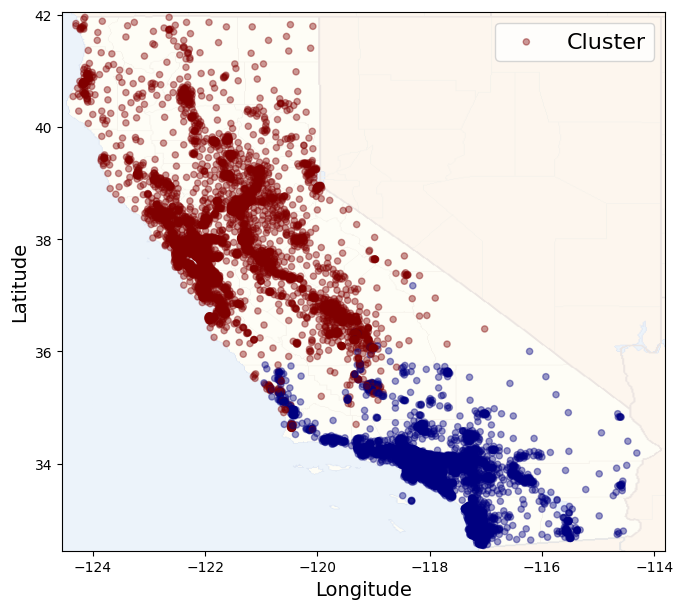

Sum Squared Error for 3 clusters: 888458.1235772892
Cluster means: [array([-1.0114234 ,  1.04882351,  0.07877101, -0.20983187, -0.24426675,
       -0.27711728, -0.25016095, -0.08631459, -0.15057762,  0.16695937,
        0.48401826,  0.        ,  0.2534832 ,  0.09553916]), array([ 7.92055452e-01, -8.26394204e-01,  8.30656537e-02, -1.93888495e-01,
       -1.72838210e-01, -1.18089431e-01, -1.67606566e-01,  4.22297612e-02,
        1.05704322e-01,  6.64329702e-01,  1.75272383e-01,  4.73709143e-04,
        0.00000000e+00,  1.59924207e-01]), array([ 0.18032509, -0.15246813, -1.00358883,  2.48618335,  2.53276532,
        2.34021543,  2.52960623,  0.18878094,  0.11034609,  0.45207254,
        0.36722798,  0.        ,  0.08095855,  0.09974093])]
Within cluster standard deviation [array([0.51979367, 0.49313632, 1.03766457, 0.52613232, 0.54037055,
       0.53966955, 0.55885909, 0.98073941, 1.02818113, 0.37293959,
       0.49974452, 0.        , 0.43500513, 0.29395822]), array([0.36743807, 0.2462021

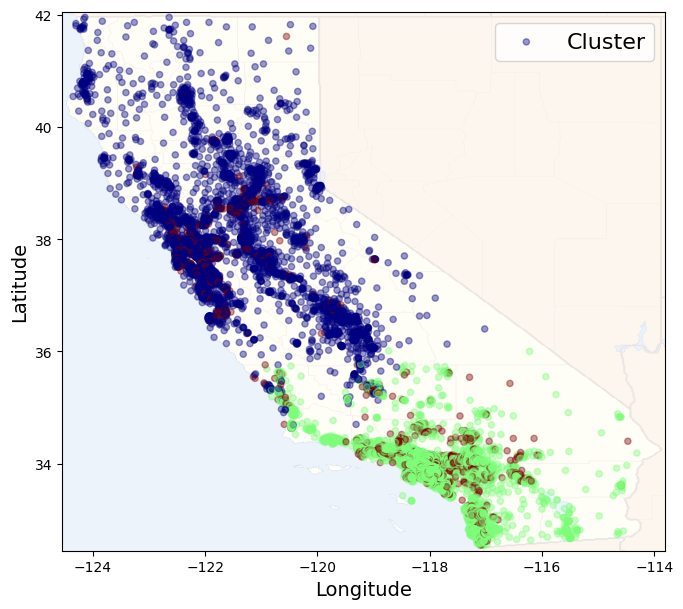

Sum Squared Error for 4 clusters: 786482.5828369632
Cluster means: [array([-0.728816  ,  1.01836408, -0.13502717, -0.29274315, -0.29335854,
       -0.31665453, -0.32319883, -0.53600402, -0.79205291,  0.08433108,
        0.76435884,  0.        ,  0.11070623,  0.04060385]), array([ 0.25650253, -0.21303262, -1.04686096,  2.6972112 ,  2.74488424,
        2.54022272,  2.73482863,  0.18121011,  0.06768646,  0.45454545,
        0.38197097,  0.        ,  0.06951872,  0.09396486]), array([-1.30163695,  0.9274813 ,  0.35557351, -0.01229136, -0.10023047,
       -0.15587177, -0.07030201,  0.64821681,  0.90233156,  0.30525031,
        0.03052503,  0.        ,  0.47649573,  0.18772894]), array([ 7.89794741e-01, -8.38360013e-01,  9.55736285e-02, -1.75214166e-01,
       -1.52941428e-01, -9.61558077e-02, -1.44479834e-01,  7.07567903e-02,
        1.47683750e-01,  6.85483871e-01,  1.50213758e-01,  4.85814225e-04,
        0.00000000e+00,  1.63816557e-01])]
Within cluster standard deviation [array([0.72285

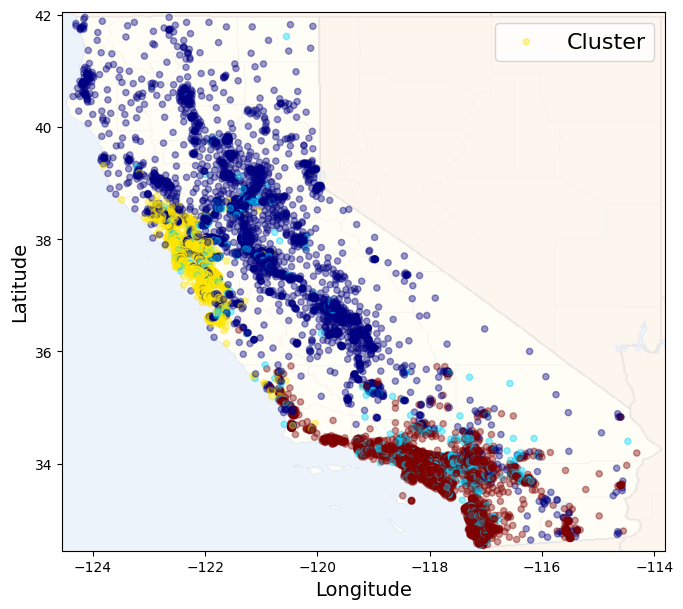

Sum Squared Error for 5 clusters: 714143.5782453364
Cluster means: [array([-1.30182378,  0.92778858,  0.31544961,  0.0501574 , -0.04204658,
       -0.10376861, -0.00866058,  0.69387645,  0.94463857,  0.3108065 ,
        0.03187759,  0.        ,  0.46987568,  0.18744023]), array([ 0.94552846, -0.81970946, -0.43750977,  0.13685869,  0.27367192,
        0.30123948,  0.24347247, -0.42393055, -0.51888921,  0.27333691,
        0.46646996,  0.        ,  0.        ,  0.26019313]), array([-0.85598052,  1.11698712, -0.06603262, -0.30854628, -0.31323651,
       -0.33492707, -0.3388782 , -0.50930741, -0.74474318,  0.09243546,
        0.72883192,  0.        ,  0.13468135,  0.04405127]), array([ 7.02243597e-01, -8.07175311e-01,  2.80484833e-01, -2.69678755e-01,
       -2.99107792e-01, -2.41994715e-01, -2.79260706e-01,  2.72289489e-01,
        4.08876204e-01,  8.47843999e-01,  4.47679209e-02,  6.86624554e-04,
        0.00000000e+00,  1.06701456e-01]), array([ 0.1954186 , -0.171632  , -1.0851833 ,  3.

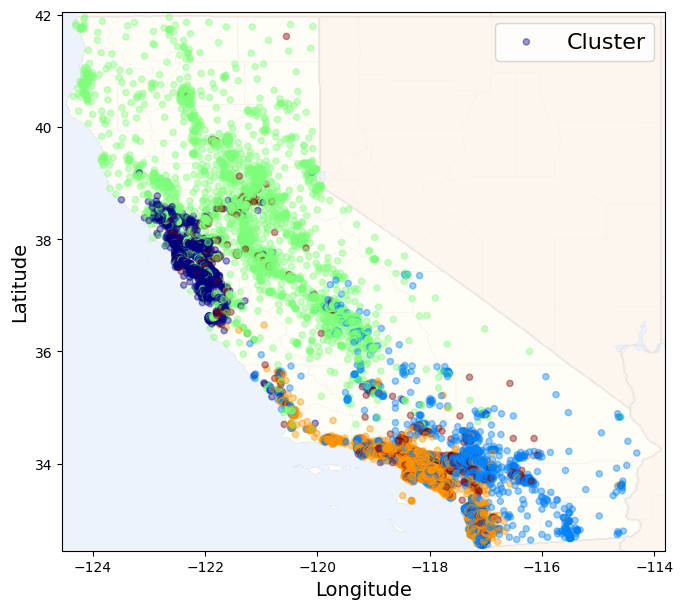

Sum Squared Error for 6 clusters: 664535.8032742715
Cluster means: [array([-1.30977838,  0.93623797,  0.41231204,  0.0348629 , -0.08527596,
       -0.14703252, -0.05073284,  0.8108459 ,  1.07641408,  0.29247142,
        0.03389831,  0.        ,  0.48443043,  0.18919984]), array([-0.26629173,  0.45483354, -0.77635388,  0.60378833,  0.67993411,
        0.61274996,  0.65524054, -0.34058538, -0.58047453,  0.1771639 ,
        0.66445672,  0.        ,  0.06740331,  0.09097606]), array([-0.93864503,  1.13762683,  0.14132487, -0.52939197, -0.54436646,
       -0.5584241 , -0.57311698, -0.47855882, -0.65239282,  0.10424188,
        0.65072202,  0.        ,  0.18524368,  0.05979242]), array([ 0.73177972, -0.83765653, -0.19748888,  0.24233029,  0.13476564,
        0.07628509,  0.15987079,  0.89628467,  1.00431545,  0.79192201,
        0.05598886,  0.        ,  0.        ,  0.15208914]), array([ 8.11052441e-01, -8.25492555e-01,  3.08346868e-01, -4.51810772e-01,
       -3.74684744e-01, -2.53288986e-

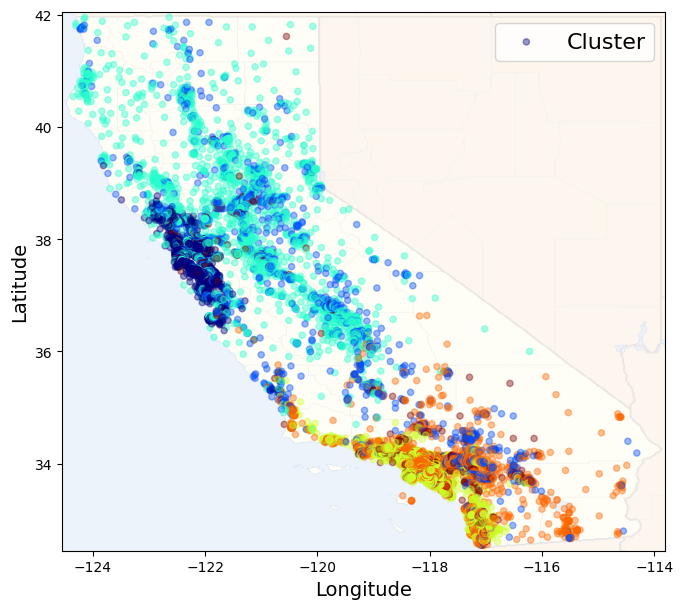

Sum Squared Error for 7 clusters: 605755.2932835274
Cluster means: [array([ 0.91102702, -0.79857112, -0.28849003, -0.0187642 ,  0.13836728,
        0.21772465,  0.10829566, -0.53371086, -0.57327625,  0.3478397 ,
        0.43112085,  0.        ,  0.        ,  0.22103945]), array([ 0.73448215, -0.817478  ,  0.37853296, -0.45954942, -0.50038974,
       -0.43721278, -0.48946925,  0.21792628,  0.30238647,  0.77708368,
        0.08959395,  0.00082196,  0.        ,  0.13250041]), array([-1.30944286,  0.93295638,  0.51904678, -0.1455142 , -0.23071361,
       -0.29029365, -0.20503791,  0.65630515,  0.93623125,  0.25429553,
        0.02714777,  0.        ,  0.52680412,  0.19175258]), array([ 0.31123502, -0.44977702, -0.55993399,  0.78025882,  0.75358482,
        0.71017251,  0.79779648,  0.48133081,  0.58395345,  0.75939505,
        0.08661778,  0.        ,  0.02245646,  0.13153071]), array([-0.85123271,  1.13980614, -0.08864659, -0.33384833, -0.33798992,
       -0.3615193 , -0.36611949, -0.5302

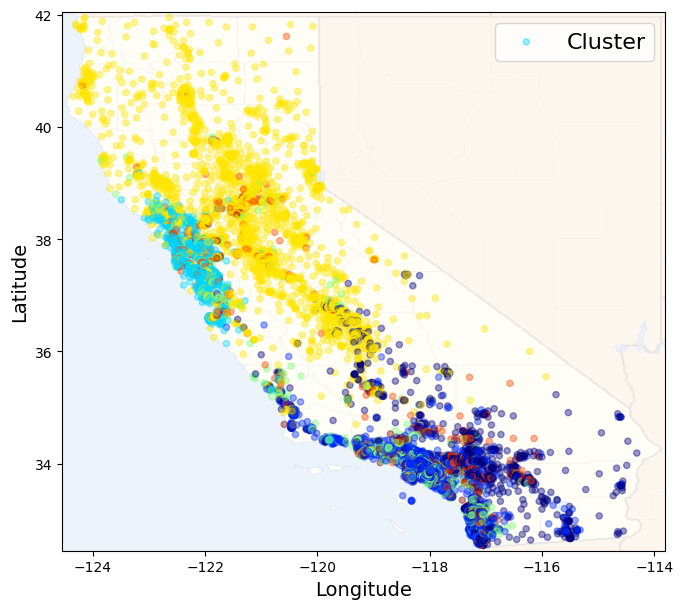

Sum Squared Error for 8 clusters: 556625.6212938221
Cluster means: [array([ 0.78166707, -0.83058302, -0.46699111,  0.61164384,  0.6953279 ,
        0.68964852,  0.72331208,  0.1916055 ,  0.31535569,  0.72113464,
        0.13184179,  0.        ,  0.        ,  0.14702357]), array([ 0.16384517, -0.12689802, -1.00641962,  2.31830964,  2.42036592,
        2.20117833,  2.4211566 ,  0.14769205,  0.04721492,  0.4295612 ,
        0.40184758,  0.        ,  0.08083141,  0.08775982]), array([ 0.91296282, -0.78253281, -0.05687877, -0.28375857, -0.17525855,
       -0.08131553, -0.20277884, -0.61147911, -0.69215206,  0.28742515,
        0.4739521 ,  0.        ,  0.        ,  0.23862275]), array([-1.03316191,  1.06109476, -0.55385686,  0.52795721,  0.54786756,
        0.4666778 ,  0.56877939, -0.10949211, -0.20828109,  0.24055476,
        0.4844572 ,  0.        ,  0.18364419,  0.09134385]), array([ 0.69630507, -0.80446456,  0.37431725, -0.43206638, -0.48945993,
       -0.43933321, -0.4770621 ,  0.3622

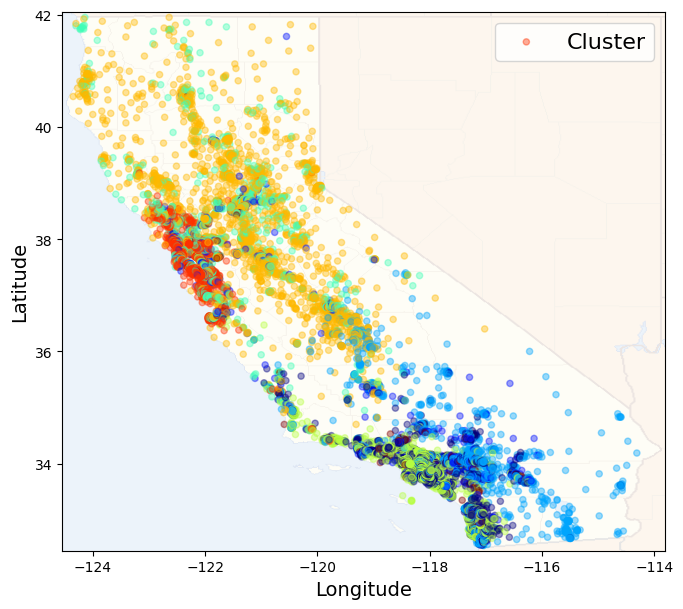

Sum Squared Error for 9 clusters: 518981.70514331525
Cluster means: [array([ 0.60073959, -0.742106  , -0.12670709,  0.10431758, -0.19473201,
       -0.21685232, -0.17181295,  1.70328651,  1.65221997,  0.7658707 ,
        0.05824112,  0.        ,  0.        ,  0.17588818]), array([ 6.83960611e-01, -7.90359176e-01,  4.14380930e-01, -4.06270430e-01,
       -3.42490478e-01, -2.29392756e-01, -3.25384481e-01, -1.95542758e-01,
       -7.57771616e-03,  9.16848221e-01,  2.03340595e-02,  9.07770516e-04,
        0.00000000e+00,  6.19099492e-02]), array([-1.31746373,  0.94072502,  0.66127881, -0.29010859, -0.37983507,
       -0.4242872 , -0.35993562,  0.62708669,  0.91498596,  0.23333333,
        0.02690763,  0.        ,  0.5502008 ,  0.18955823]), array([-1.14065318,  1.02660984, -0.73936388,  1.75733691,  1.7323666 ,
        1.57596373,  1.82757445,  0.28822648,  0.28328242,  0.2829582 ,
        0.32636656,  0.        ,  0.2829582 ,  0.10771704]), array([ 0.43807824, -0.33824123, -1.35807303,  5

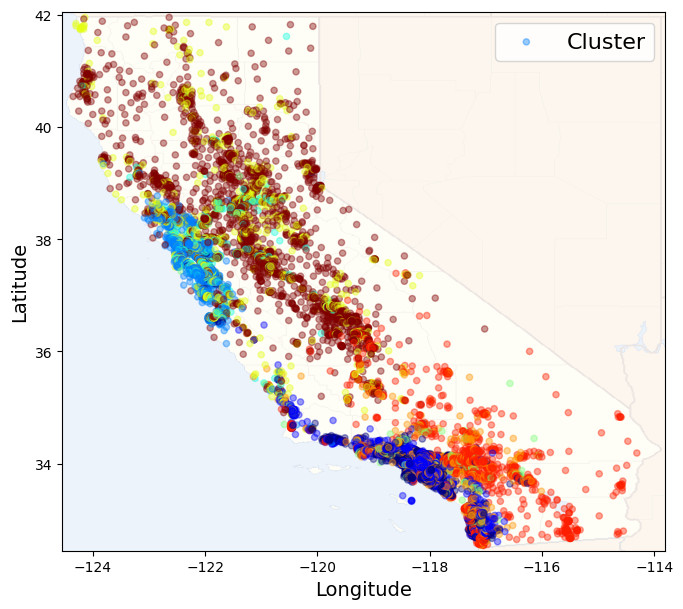

Sum Squared Error for 10 clusters: 506371.64302476816
Cluster means: [array([-1.32757294,  0.95003555,  0.66592355, -0.19101746, -0.26900687,
       -0.31978672, -0.24448703,  0.57013828,  0.87839893,  0.22929936,
        0.01671975,  0.        ,  0.56329618,  0.19068471]), array([ 5.58026936e-01, -6.93167493e-01,  2.92967145e-02, -3.63944082e-02,
       -2.56204334e-01, -2.74878085e-01, -2.29120564e-01,  1.31996250e+00,
        1.36896117e+00,  9.72234866e-01,  2.73099681e-02,  0.00000000e+00,
        0.00000000e+00,  4.55166136e-04]), array([ 0.77279898, -0.95140652, -0.15772896, -0.13501361, -0.24725996,
       -0.34400113, -0.26001769,  0.6380371 ,  0.89507418,  0.        ,
        0.16954644,  0.00215983,  0.        ,  0.82829374]), array([-0.75590757,  1.05764538, -0.49587913,  0.08636375,  0.09182896,
        0.05665325,  0.07205049, -0.41891139, -0.72277443,  0.11461856,
        0.78278843,  0.        ,  0.06501315,  0.03757986]), array([ 8.12090432e-01, -8.11234227e-01,  4.010

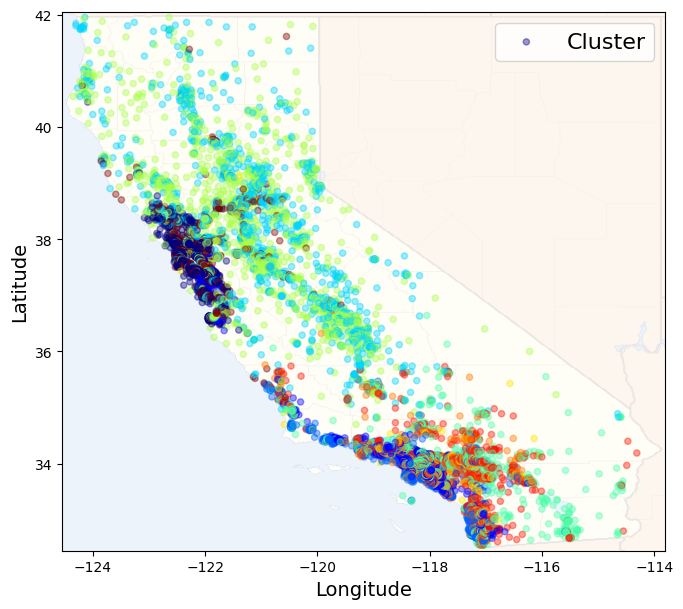

In [ ]:
squared_errors = []
for i in range(10):
  kMeans = myKMeans(i + 1);
  kMeans.kMeans(X_train);
  squareError = kMeans.squaredError(X_train);
  squared_errors.append(squareError);
  print("Sum Squared Error for", i + 1, "clusters:", squareError)
  print("Cluster means:", kMeans.getClusterMeans())
  print("Within cluster standard deviation", kMeans.standardDeviation(X_train))
  plotMap();
  plt.show();

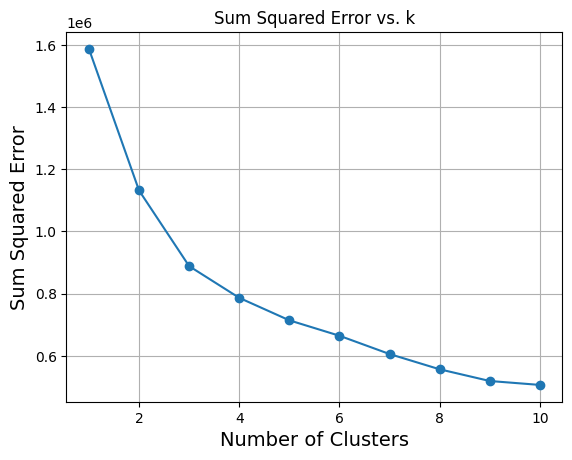

In [ ]:
plt.plot(range(1, kMeans.k + 1), squared_errors, marker='o', linestyle='-')
plt.ylabel("Sum Squared Error", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=14)
plt.title("Sum Squared Error vs. k")
plt.grid(True)
plt.show()

As I increase K for the algorithm the within cluster standard deviations for each attribute dropped. This would make sense because as there is more clusters than there is less distance between each centroid and their respective points which means the standard deviation of the points would also decrease. The sum squared error also dereases as K increases for the same reason that more centroids means there is less distance between all points and their closest centroid. When graphing the K against the sum squared error I get a negative exponential graph. The ideal K is where the graph switches gradient the most (the elbow). When looking at my graph I would say the ideal K is 3. There is a cluster that represents the nothern housing market, a cluster representing the southern housing market, and a cluster that seems to pick housing in the most populous citites such as SF, Sacremento, and Irvine/LA. You can find the attributes that group a cluster together the most by looking at the ones with the lowest standard deviation and reporting their means. The nothern cluster had the lowest of all the clusters when it came to the feature of median income. Whilst the cluster focused in the urban areas had the highest mean when it came to median income.